# Jenna Stover
# Data in Emerging Media & Technology
# Final Data Report
# December 10, 2025
Hypothesis- My Spotify data shows that I am more likely to have the same artist as my top artist than the same song as my top track. This will indicate that I am more loyal to an artist than a specific song.

In [5]:
import os
import json
import pandas as pd

folder = "/Users/jenna/Desktop/spotify_data"

records = []

for file in os.listdir(folder):
    if file.endswith(".json"):
        filepath = os.path.join(folder, file)

        try:
            with open(filepath, "r", encoding="utf-8") as f:
                data = json.load(f)
        except:
            print(f"Skipping invalid JSON file: {file}")
            continue

        if isinstance(data, dict):
            possible_keys = ["plays", "streams", "items", "data"]
            found = False
            for key in possible_keys:
                if key in data and isinstance(data[key], list):
                    data = data[key]
                    found = True
                    break
            if not found:
                print(f"Skipping file (no list found): {file}")
                continue

        if not isinstance(data, list):
            print(f"Skipping unexpected structure in: {file}")
            continue

        for entry in data:
            if not isinstance(entry, dict):
                continue

            ts = (
                entry.get("ts") or
                entry.get("endTime") or
                entry.get("timestamp") or
                entry.get("date")
            )

            track = (
                entry.get("trackName") or
                entry.get("track") or
                entry.get("track_name")
            )

            artist = (
                entry.get("artistName") or
                entry.get("artist") or
                entry.get("artist_name")
            )

            duration = (
                entry.get("msPlayed") or
                entry.get("duration_ms")
            )

            if ts:
                records.append({
                    "timestamp": ts,
                    "track": track,
                    "artist": artist,
                    "msPlayed": duration
                })

print(f"Loaded {len(records)} total valid plays.")

df = pd.DataFrame(records)

df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
df = df.dropna(subset=["timestamp"])

df_2025 = df[df["timestamp"].dt.year == 2025].copy()

df_2025["month"] = df_2025["timestamp"].dt.to_period("M")

artists_per_month = (
    df_2025.groupby(["month", "artist"])
    .size()
    .reset_index(name="plays")
    .sort_values(["month", "plays"], ascending=[True, False])
)

top_artists = artists_per_month.groupby("month").first()

songs_per_month = (
    df_2025.groupby(["month", "track"])
    .size()
    .reset_index(name="plays")
    .sort_values(["month", "plays"], ascending=[True, False])
)

top_songs = songs_per_month.groupby("month").first()

top_artists, top_songs


Skipping invalid JSON file: UserAddress.json
Skipping file (no list found): Follow.json
Skipping file (no list found): Inferences.json
Skipping file (no list found): UserPrompts.json
Skipping file (no list found): Userdata.json
Skipping file (no list found): Wrapped2024.json
Skipping file (no list found): MessageData.json
Skipping file (no list found): Playlist1.json
Skipping file (no list found): Identity.json
Skipping file (no list found): PodcastShows.json
Skipping file (no list found): YourLibrary.json
Skipping file (no list found): Payments.json
Skipping file (no list found): YourSoundCapsule.json
Skipping file (no list found): S4XProfile.json
Skipping file (no list found): Identifiers.json
Loaded 120372 total valid plays.


(                        artist  plays
 month                                
 2025-01              Glee Cast    334
 2025-02          One Direction    392
 2025-03          One Direction    626
 2025-04          One Direction    369
 2025-05              Glee Cast    475
 2025-06          One Direction    171
 2025-07          One Direction    176
 2025-08          One Direction    283
 2025-09          One Direction    581
 2025-10          One Direction    404
 2025-11  Red Hot Chili Peppers    155,
                              track  plays
 month                                    
 2025-01               Ice Ice Baby     26
 2025-02                      Latch     20
 2025-03  Mission: Impossible Theme     54
 2025-04                 Convenient     24
 2025-05            back to friends    155
 2025-06          Beauty And A Beat     20
 2025-07            back to friends     24
 2025-08            back to friends     33
 2025-09           Under the Bridge     82
 2025-10           

In [6]:
top_songs_with_artist = top_songs.merge(
    df_2025[["track", "artist"]].drop_duplicates(),
    on="track",
    how="left"
)

top_artist_each_month = artists_per_month.groupby("month").first()

print("Most played song per month (with artist):")
display(top_songs_with_artist)

print("Most played artist per month:")
display(top_artist_each_month)

Most played song per month (with artist):


,track,plays,artist
0,Ice Ice Baby,26,Vanilla Ice
1,Ice Ice Baby,26,Crazy Frog
2,Latch,20,Disclosure
3,Mission: Impossible Theme,54,Michael Giacchino
4,Convenient,24,Griffin Johnson
5,back to friends,155,sombr
6,Beauty And A Beat,20,Justin Bieber
7,back to friends,24,sombr
8,back to friends,33,sombr
9,Under the Bridge,82,Red Hot Chili Peppers


Most played artist per month:


,artist,plays
month,,
2025-01,Glee Cast,334
2025-02,One Direction,392
2025-03,One Direction,626
2025-04,One Direction,369
2025-05,Glee Cast,475
2025-06,One Direction,171
2025-07,One Direction,176
2025-08,One Direction,283
2025-09,One Direction,581


<Figure size 800x500 with 0 Axes>

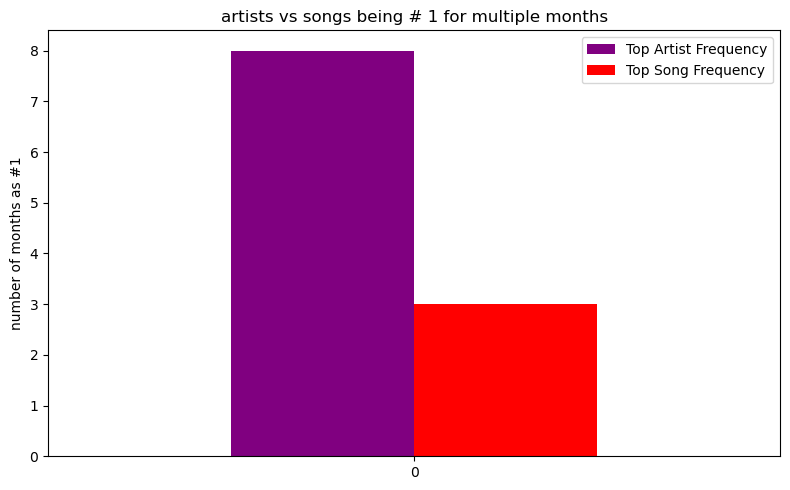

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

ta = top_artists.reset_index()
ts = top_songs.reset_index()

artist_counts = ta["artist"].value_counts()
song_counts = ts["track"].value_counts()

comparison = pd.DataFrame({
    "Top Artist Frequency": [artist_counts.max()],
    "Top Song Frequency": [song_counts.max()]
})

plt.figure(figsize=(8,5))

comparison.plot(
    kind="bar",
    rot=0,
    figsize=(8,5),
    color=["purple", "red"]
)

plt.title("artists vs songs being # 1 for multiple months")
plt.ylabel("number of months as #1")
plt.legend()
plt.tight_layout()
plt.show()

# Purpose of the analysis
The purpose of my analysis is to prove my hpothesis.

# Starting point
The starting point of my data was January 1, 2025 when I first started listening to music for the year.

# Source of the data
The source of my data was from Spotify. I downloaded the data and compressed it into a folder on my computer desktop. 

# Structure of the data
I have a bar graph to visualize my data and then I have a table of my top songs, who they are by, and how many times I listened to that song and a table of my top artists and how many times I played them along with the specified month. The Spotify data is organized through folders with data inside each folder. Some folders have sub folders. The data I will be using is streaming history because that shows what songs I streamed and the artists I streamed. 

# What you did
I uploaded my data into Jupyter and made a table of my data along with charts that better show and represent my data.

# What the results mean
The results showed that my hypothesis was correct and that I am more loyal to a specific artist rather than one song. There was some repetition in the songs but more repeptition in the artists.

# Conclusion


My audience should see that my Spotify data was properly inputed and the diagram further enhanced my data. They should also see that my hypothesis was correct. My data shows my top artists and top songs for each month. The bar graph is a visual comparison between my top song and top artist frequency. I did not really have any limitations because all of my data I had and I did not have any trouble gathering the data. AN alternative approach could have been a different hypothesis or a different visual. 